In [2]:
import pandas as pd 
from bs4 import BeautifulSoup
import requests


# Web Scraping Executive Orders


In [200]:
# setting up df
executive_orders = pd.DataFrame(columns=['order_no', 'title', 'text', 'date'])

#making the scraping into a function
def scrape_executive_orders(start, end):
    for num in range(start, end):
        url = f"https://en.wikisource.org/wiki/Executive_Order_{num}"
        order_no = num
        page = requests.get(url)
        soup = BeautifulSoup(page.text, 'html.parser')
        if soup.find('span', {'id': 'Wikisource_does_not_have_a_text_with_this_exact_name'}):
            continue
        else:
            title = soup.find(id='header_section_text').text
            date = soup.find('span', class_='plainlinks').text.split(' ')[-3:]
            date_string = ' '.join(date)
            
            # Find all paragraph tags
            texts = soup.find_all('p')

            # Create string with all the text that stops before copyright stuff
            stop_text1 = "This work is in the public domain"
            stop_text2 = "Public domain"
            full_text = ''
            skip_keywords = ['from:']
            for text in texts:
                if "<b>" not in str(text):
                    paragraph_text = text.get_text().lower()
                    if any(keyword in paragraph_text for keyword in skip_keywords):
                        continue
                    if stop_text1 in paragraph_text or stop_text2 in paragraph_text:
                        break
                    full_text += paragraph_text
                    full_text = full_text.replace('\n', ' ')

            #add to dataframe
            new_row = {'order_no': order_no, 'title': title, 'text': full_text, 'date': date_string}
            executive_orders.loc[len(executive_orders)] = new_row
    return executive_orders

In [201]:
scrape_executive_orders(6071, 7000)
executive_orders

,order_no,title,text,date
0,6071,Appointment of August A. Gennerich,august a. gennerich may be appointed an opera...,"March 8, 1933"
1,6072,Transfer of Control and Jurisdiction of Certai...,canal zoneby virtue of the authority vested i...,"March 8, 1933"
2,6073,Regulations Concerning the Operation of Banks,by virtue of the authority vested in me by se...,"March 10, 1933"
3,6084,Consolidating Federal Farm Credit Agencies,whereas sections 401 and 403 of title iv of p...,"March 27, 1933.ttt"
4,6086,Establishing the Rio Grande Wildlife Refuge,it is hereby ordered that executive order no....,"March 28, 1933."
5,6092,Veterans Regulations No. 4,veterans regulations no. 4 protected awards w...,"March 31, 1933"
6,6093,Veterans Regulations No. 5,veterans regulation no. 5 entitlement to emer...,"March 31, 1933"
7,6098,Veterans Regulation No.10: Miscellaneous Provi...,veterans regulation no. 10 miscellaneous provi...,"March 31, 1933"
8,6099,Veterans Regulation No.11: Disclosure of Infor...,disclosure of information--copies of records e...,"March 31, 1933"
9,6100,Veterans Regulations No.12: Presumption of Ent...,"presumption of entitlement, etc. executive ord...","March 27, 1933"


In [202]:
executive_orders.to_csv('executive_orders.csv')

In [203]:
#7000 to 8000
scrape_executive_orders(7000, 8000)
executive_orders.to_csv('executive_orders.csv')

In [213]:
# Only need to clean up two dates
executive_orders.at[3, 'date'] = 'March 27, 1933'
executive_orders.at[4, 'date'] = 'March 28, 1933'

In [214]:
executive_orders

,order_no,title,text,date
0,6071,Appointment of August A. Gennerich,august a. gennerich may be appointed an opera...,"March 8, 1933"
1,6072,Transfer of Control and Jurisdiction of Certai...,canal zoneby virtue of the authority vested i...,"March 8, 1933"
2,6073,Regulations Concerning the Operation of Banks,by virtue of the authority vested in me by se...,"March 10, 1933"
3,6084,Consolidating Federal Farm Credit Agencies,whereas sections 401 and 403 of title iv of p...,"March 27, 1933"
4,6086,Establishing the Rio Grande Wildlife Refuge,it is hereby ordered that executive order no....,"March 28, 1933"
...,...,...,...,...
91,7944,Amendment of the Executive Order of January 17...,by virtue of and pursuant to the authority ves...,"August 4, 1938"
92,7956,"Authorizing the Employment Until February 1, 1...",by virtue of and pursuant to the authority ves...,"August 19, 1938"
93,7962,Amendment of Executive Order No. 4601 of March...,by virtue of and pursuant to the authority ve...,"August 22, 1938"
94,7983,"Establishing the Breton Bird Refuge, Louisiana",by virtue of and pursuant to the authority ves...,"October 4, 1938"


In [215]:
executive_orders.to_csv('executive_orders.csv')

In [216]:
#8000 to 9000
scrape_executive_orders(8000, 9000)
executive_orders.to_csv('executive_orders.csv')

In [218]:
#9000 to 10000
# if re-running, cut off before 9540, since that will have to be added manually (see below)
scrape_executive_orders(9000, 10000)
executive_orders.to_csv('executive_orders.csv')

AttributeError: 'NoneType' object has no attribute 'text'

In [219]:
executive_orders

,order_no,title,text,date
0,6071,Appointment of August A. Gennerich,august a. gennerich may be appointed an opera...,"March 8, 1933"
1,6072,Transfer of Control and Jurisdiction of Certai...,canal zoneby virtue of the authority vested i...,"March 8, 1933"
2,6073,Regulations Concerning the Operation of Banks,by virtue of the authority vested in me by se...,"March 10, 1933"
3,6084,Consolidating Federal Farm Credit Agencies,whereas sections 401 and 403 of title iv of p...,"March 27, 1933"
4,6086,Establishing the Rio Grande Wildlife Refuge,it is hereby ordered that executive order no....,"March 28, 1933"
...,...,...,...,...
182,9508,Authorizing the Secretary of War to Take Posse...,whereas the national war labor board has found...,"December 27, 1944"
183,9511,Authorizing the Secretary of War To Take Posse...,by virtue of the authority vested in me by the...,"January 12, 1945"
184,9533,Changing the Name of the Customs Port of Entry...,by virtue of the authority vested in me by se...,"March 23, 1945"
185,9537,"Amending Executive Order 8396 of April 18, 194...","amending executive order 8396 of april 18, 194...","April 11, 1945"


Got to 9538 before throwing an error. It's just EO 9540 that appears to be formatted weirdly, so adding that one in manually. https://en.wikisource.org/wiki/Executive_Order_9540

In [222]:
title = "AUTHORIZING THE PETROLEUM ADMINISTRATIOR TO TAKE THE POSESSION OF AND TO THE CITIES SERVICE REFINING CORPORATION, LOCATED IN AND AROUND LAKE CHARLES, LOUISIANA".title()
text = "Whereas after investigation I find and proclaim that the plants and facilities owned or leased by the Cities Service Refining Corporation located in and around Lake Charles, Louisiana, are equipped for the manufacture and production of articles and materials that are required for the war effort , or that are useful in connection therewith; that there are existing interruptions of the operation of the said plants and facilities as a result of a labor disturbance; that the war efforts will be unduly impeded or delayed by these interruptions; and that the exercise, as a hereinafter specified, of the powers vested in me is necessary to insure, in the interest of the war effort, the operation of these plants and facilities: Now, Therefore, by virtue of the power and authority vested in me by the Constitution and laws of the United States, including section 9 of the Selective Training and Service Act of 1940 (54 Stat. 892) as amended by the War Labor Disputes Act (57 Stat. 163), as President of the United States and Commander in Chief of the Army and Navy of the United States, it is hereby ordered as follows: 1. The Petroleum Administrator is hereby authorized and directed, through and with the aid of any persons or instrumentalities that he may designate, to take possession of the plants and facilities of the Cities Service Refining Corporation located in and around Lake Charles, Louisiana, and to the extent that he may deem necessary, of any real or personal property , and other assets wherever situated, used in connection with the operations thereof; to operate or to arrange for the operation of the plants and facilities in any manner, in accordance with applicable laws, that he may deem necessary for the successful prosecution of the war; to exercise any contractual or other rights of the Cities Service Refining Corporation, and to continue or discontinue the employment of, or to employ, any persons; and to do any other things that he may deem necessary for, or incidental to, the operation of the sale plants and facilities and the production, sale, and distribution of the products thereof; and to take any other steps that he deems necessary to carry out the provisions and purposes of this order. 2. All Federal agencies, including, but not limited to, the National War Labor Board, the War Manpower Commission the National Selective Service System, and the Department of Justice, are directed to cooperate with the Petroleum Administrator to the fullest extent possible in carrying out the purposes of this order. 3. The Petroleum Administrator shall provide such protection as may be required for such plants and facilities, and protection for all persons employed or seeking employment therein, both while at work, and for their families and homes; and upon the request of the Petroleum Administrator, or such person as may be designated to act for him, the Secretary of War shall take such action as may be necessary to provide such action as may to such persons and property. 4. The Petroleum Administrator shall permit the management of the plants and facilities taken under the provisions of this order to continue with its managerial functions to the maximum degree possible consistent with the aims of the order. 5. Possession, control, and operation of any plant or facility, or part thereof, taken under this order shall be terminated b the Petroleum Administrator after possession of such plant, facility, or part thereof, is no longer required for the successful prosecution of the war, but in no event more than sixty days after the restoration of productive efficiency thereof prevailing prior to the taking of possession thereof. 6. The Petroleum Administrator may delegate any and all power, authority, and discretion conferred upon him by this order to the Deputy Petroleum Administrator. The Petroleum Administrator and Deputy Petroleum Administrator may exercise the powers, authority, and discretion conferred upon them by this or under the provisions of the Petroleum Administration for War in such manner as the Petroleum Administrator of Deputy Petroleum Administrator may determine.".lower()
date_string = "April 17, 1945"
num = "9540"
new_row = {'order_no': num, 'title': title, 'text': full_text, 'date': date_string}
executive_orders.loc[len(executive_orders)] = new_row
executive_orders

,order_no,title,text,date
0,6071,Appointment of August A. Gennerich,august a. gennerich may be appointed an opera...,"March 8, 1933"
1,6072,Transfer of Control and Jurisdiction of Certai...,canal zoneby virtue of the authority vested i...,"March 8, 1933"
2,6073,Regulations Concerning the Operation of Banks,by virtue of the authority vested in me by se...,"March 10, 1933"
3,6084,Consolidating Federal Farm Credit Agencies,whereas sections 401 and 403 of title iv of p...,"March 27, 1933"
4,6086,Establishing the Rio Grande Wildlife Refuge,it is hereby ordered that executive order no....,"March 28, 1933"
...,...,...,...,...
183,9511,Authorizing the Secretary of War To Take Posse...,by virtue of the authority vested in me by the...,"January 12, 1945"
184,9533,Changing the Name of the Customs Port of Entry...,by virtue of the authority vested in me by se...,"March 23, 1945"
185,9537,"Amending Executive Order 8396 of April 18, 194...","amending executive order 8396 of april 18, 194...","April 11, 1945"
186,9538,Authorizing Certification for Probational Appo...,by virtue of the authority vested in me by sec...,"April 13, 1945"


In [223]:
# continuing to 10000
scrape_executive_orders(9541, 10000)
executive_orders.to_csv('executive_orders.csv')

AttributeError: 'NoneType' object has no attribute 'text'

In [224]:
executive_orders

,order_no,title,text,date
0,6071,Appointment of August A. Gennerich,august a. gennerich may be appointed an opera...,"March 8, 1933"
1,6072,Transfer of Control and Jurisdiction of Certai...,canal zoneby virtue of the authority vested i...,"March 8, 1933"
2,6073,Regulations Concerning the Operation of Banks,by virtue of the authority vested in me by se...,"March 10, 1933"
3,6084,Consolidating Federal Farm Credit Agencies,whereas sections 401 and 403 of title iv of p...,"March 27, 1933"
4,6086,Establishing the Rio Grande Wildlife Refuge,it is hereby ordered that executive order no....,"March 28, 1933"
...,...,...,...,...
286,9979,Prescribing Portions of the Selective Service ...,by virtue of the authority vested in me by tit...,"July 20, 1948"
287,9980,Regulations Governing Fair Employment Practice...,whereas it is desirable and in the public inte...,"July 26, 1948"
288,9981,Establishing the President's Committee on Equa...,⁠whereas it is essential that there be maintai...,"July 26, 1948"
289,9982,Extending the Provisions of Executive Order No...,by virtue of the authority vested in me by the...,"July 29, 1948"


Got to 9983. 9984 doesn't have the date formatted correctly. Adding manually.

In [226]:
url = "https://en.wikisource.org/wiki/Executive_Order_9984"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
order_no = 9984
title = soup.find(id='header_section_text').text
date_string = 'July 31, 1948' #hard coding

# Find all paragraph tags
texts = soup.find_all('p')

# Create string with all the text that stops before copyright stuff
stop_text1 = "This work is in the public domain"
stop_text2 = "Public domain"
full_text = ''
skip_keywords = ['from:']
for text in texts:
    if "<b>" not in str(text):
        paragraph_text = text.get_text().lower()
        if any(keyword in paragraph_text for keyword in skip_keywords):
            continue
        if stop_text1 in paragraph_text or stop_text2 in paragraph_text:
            break
        full_text += paragraph_text
        full_text = full_text.replace('\n', ' ').split(' ')[:-9] #removing last 9 words
        full_text = ' '.join(full_text)

#add to dataframe
new_row = {'order_no': order_no, 'title': title, 'text': full_text, 'date': date_string}
executive_orders.loc[len(executive_orders)] = new_row
executive_orders

,order_no,title,text,date
0,6071,Appointment of August A. Gennerich,august a. gennerich may be appointed an opera...,"March 8, 1933"
1,6072,Transfer of Control and Jurisdiction of Certai...,canal zoneby virtue of the authority vested i...,"March 8, 1933"
2,6073,Regulations Concerning the Operation of Banks,by virtue of the authority vested in me by se...,"March 10, 1933"
3,6084,Consolidating Federal Farm Credit Agencies,whereas sections 401 and 403 of title iv of p...,"March 27, 1933"
4,6086,Establishing the Rio Grande Wildlife Refuge,it is hereby ordered that executive order no....,"March 28, 1933"
...,...,...,...,...
287,9980,Regulations Governing Fair Employment Practice...,whereas it is desirable and in the public inte...,"July 26, 1948"
288,9981,Establishing the President's Committee on Equa...,⁠whereas it is essential that there be maintai...,"July 26, 1948"
289,9982,Extending the Provisions of Executive Order No...,by virtue of the authority vested in me by the...,"July 29, 1948"
290,9983,Exemption of Garland S. Ferguson From Compulso...,"executive order 9983, exempting garland s. fer...","July 31, 1948"


In [227]:
# finishing to 10000
scrape_executive_orders(9985, 10000)
executive_orders.to_csv('executive_orders.csv')

In [228]:
# adjusting the function for if there is weird formatting
# will return None for date/title if not found

#making the scraping into a function
def scrape_executive_orders(start, end):
    for num in range(start, end):
        url = f"https://en.wikisource.org/wiki/Executive_Order_{num}"
        order_no = num
        page = requests.get(url)
        soup = BeautifulSoup(page.text, 'html.parser')
        if soup.find('span', {'id': 'Wikisource_does_not_have_a_text_with_this_exact_name'}):
            continue
        else:

            # title
            title_element = soup.find(id='header_section_text')
            if title_element:
                title = title_element.text
            else:
                title = None


            date_element = soup.find('span', class_='plainlinks')
            if date_element:
                date = date_element.text.split(' ')[-3:]
                date_string = ' '.join(date)
            else:
                date_string = None
            
            # Find all paragraph tags
            texts = soup.find_all('p')

            # Create string with all the text that stops before copyright stuff
            stop_text1 = "This work is in the public domain"
            stop_text2 = "Public domain"
            full_text = ''
            skip_keywords = ['from:']
            for text in texts:
                if "<b>" not in str(text):
                    paragraph_text = text.get_text().lower()
                    if any(keyword in paragraph_text for keyword in skip_keywords):
                        continue
                    if stop_text1 in paragraph_text or stop_text2 in paragraph_text:
                        break
                    full_text += paragraph_text
                    full_text = full_text.replace('\n', ' ')

            #add to dataframe
            new_row = {'order_no': order_no, 'title': title, 'text': full_text, 'date': date_string}
            executive_orders.loc[len(executive_orders)] = new_row
    return executive_orders

In [229]:
#10000 to 11000
scrape_executive_orders(10000, 11000)

,order_no,title,text,date
0,6071,Appointment of August A. Gennerich,august a. gennerich may be appointed an opera...,"March 8, 1933"
1,6072,Transfer of Control and Jurisdiction of Certai...,canal zoneby virtue of the authority vested i...,"March 8, 1933"
2,6073,Regulations Concerning the Operation of Banks,by virtue of the authority vested in me by se...,"March 10, 1933"
3,6084,Consolidating Federal Farm Credit Agencies,whereas sections 401 and 403 of title iv of p...,"March 27, 1933"
4,6086,Establishing the Rio Grande Wildlife Refuge,it is hereby ordered that executive order no....,"March 28, 1933"
...,...,...,...,...
474,10995,Assigning Telecommunications Management Functions,whereas telecommunications is vital to the se...,"February 16, 1962"
475,10996,Promulgating Regulations Concerning Withholdin...,by virtue of the authority vested in me by th...,"February 16, 1962"
476,10997,Assigning Emergency Preparedness Functions to ...,by virtue of the authority vested in me as pr...,"February 16, 1962"
477,10998,Assigning Emergency Preparedness Functions to ...,by virtue of the authority vested in me as pr...,"February 16, 1962"


In [230]:
executive_orders.to_csv('executive_orders.csv')

In [231]:
# 11000 to 12000
scrape_executive_orders(11000, 12000)
executive_orders.to_csv('executive_orders.csv')

In [232]:
executive_orders

,order_no,title,text,date
0,6071,Appointment of August A. Gennerich,august a. gennerich may be appointed an opera...,"March 8, 1933"
1,6072,Transfer of Control and Jurisdiction of Certai...,canal zoneby virtue of the authority vested i...,"March 8, 1933"
2,6073,Regulations Concerning the Operation of Banks,by virtue of the authority vested in me by se...,"March 10, 1933"
3,6084,Consolidating Federal Farm Credit Agencies,whereas sections 401 and 403 of title iv of p...,"March 27, 1933"
4,6086,Establishing the Rio Grande Wildlife Refuge,it is hereby ordered that executive order no....,"March 28, 1933"
...,...,...,...,...
589,11957,Designation of Certain Officers to Act as Secr...,by virtue of the authority vested in me by se...,"January 13, 1977"
590,11965,Establishing the Humanitarian Service Medal,by virtue of the authority vested in me as pr...,"January 19, 1977"
591,11967,Relating to violations of the Selective Servic...,the following actions shall be taken to facili...,"January 21, 1977"
592,11969,Administration of the Emergency Natural Gas Ac...,by virtue of the authority vested in me by the...,"February 2, 1977"


In [233]:
# 12000 to 13000
scrape_executive_orders(12000, 13000)
executive_orders.to_csv('executive_orders.csv')

In [234]:
executive_orders

,order_no,title,text,date
0,6071,Appointment of August A. Gennerich,august a. gennerich may be appointed an opera...,"March 8, 1933"
1,6072,Transfer of Control and Jurisdiction of Certai...,canal zoneby virtue of the authority vested i...,"March 8, 1933"
2,6073,Regulations Concerning the Operation of Banks,by virtue of the authority vested in me by se...,"March 10, 1933"
3,6084,Consolidating Federal Farm Credit Agencies,whereas sections 401 and 403 of title iv of p...,"March 27, 1933"
4,6086,Establishing the Rio Grande Wildlife Refuge,it is hereby ordered that executive order no....,"March 28, 1933"
...,...,...,...,...
1350,12995,Amendment to Executive Order No. 12873,by the authority vested in me as president by ...,"March 25, 1996"
1351,12996,Management and General Public Use of the Natio...,by the authority vested in me as president by...,"March 25, 1996"
1352,12997,Korean Peninsula Energy Development Organization,by the authority vested in me as president by ...,"April 1, 1996"
1353,12998,Amendment to Executive Order No. 11880,by virtue of the authority vested in me as pr...,"April 5, 1996"


In [235]:
# 13000 to 14000
scrape_executive_orders(13000, 14000)
executive_orders.to_csv('executive_orders.csv')

In [237]:
executive_orders

,order_no,title,text,date
0,6071,Appointment of August A. Gennerich,august a. gennerich may be appointed an opera...,"March 8, 1933"
1,6072,Transfer of Control and Jurisdiction of Certai...,canal zoneby virtue of the authority vested i...,"March 8, 1933"
2,6073,Regulations Concerning the Operation of Banks,by virtue of the authority vested in me by se...,"March 10, 1933"
3,6084,Consolidating Federal Farm Credit Agencies,whereas sections 401 and 403 of title iv of p...,"March 27, 1933"
4,6086,Establishing the Rio Grande Wildlife Refuge,it is hereby ordered that executive order no....,"March 28, 1933"
...,...,...,...,...
2181,13995,Ensuring an Equitable Pandemic Response and Re...,by the authority vested in me as president by ...,"January 21, 2021"
2182,13996,Establishing the COVID-19 Pandemic Testing Boa...,by the authority vested in me as president by ...,"January 21, 2021"
2183,13997,Improving and Expanding Access to Care and Tre...,by the authority vested in me as president by ...,"January 21, 2021"
2184,13998,Promoting COVID-19 Safety in Domestic and Inte...,by the authority vested in me as president by ...,"January 21, 2021"


In [238]:
# 14000 to 14111 -- the most recent EO
scrape_executive_orders(14000, 14111)
executive_orders.to_csv('executive_orders.csv')

In [239]:
executive_orders

,order_no,title,text,date
0,6071,Appointment of August A. Gennerich,august a. gennerich may be appointed an opera...,"March 8, 1933"
1,6072,Transfer of Control and Jurisdiction of Certai...,canal zoneby virtue of the authority vested i...,"March 8, 1933"
2,6073,Regulations Concerning the Operation of Banks,by virtue of the authority vested in me by se...,"March 10, 1933"
3,6084,Consolidating Federal Farm Credit Agencies,whereas sections 401 and 403 of title iv of p...,"March 27, 1933"
4,6086,Establishing the Rio Grande Wildlife Refuge,it is hereby ordered that executive order no....,"March 28, 1933"
...,...,...,...,...
2248,14073,Enhancing the National Quantum Initiative Advi...,by the authority vested in me as president by ...,"May 4, 2022"
2249,14074,None,by the authority vested in me as president by...,"May 25, 2022"
2250,14075,None,by the authority vested in me as president by ...,"June 16, 2022"
2251,14092,None,by the authority vested in me as president by...,"March 14, 2023"


In [249]:
#nulls:
print('Nulls in title:', executive_orders['title'].isna().sum())
print('Nulls in date:', executive_orders['date'].isna().sum())
print('Nulls in text:', executive_orders['text'].isna().sum())

Nulls in title: 14
Nulls in date: 6
Nulls in text: 0


# Total Exec Orders

In [9]:
url = "https://en.wikipedia.org/wiki/List_of_United_States_federal_executive_orders"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
table = soup.find_all('table')[1]
df = pd.read_html(str(table))[0]


/var/folders/gf/gqtw2hsd3xx5_9tt2z47xflr0000gn/T/ipykernel_1305/319203944.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [12]:
df.head()

,#,President,Party,Total executive orders,Order number range,Years in office,Executive orders per year,Period
0,1,George Washington,Unaffiliated,8,unnumbered,7.95,1.0,"April 30, 1789 – March 4, 1797"
1,2,John Adams,Federalist,1,unnumbered,4.00,0.3,"March 4, 1797 – March 4, 1801"
2,3,Thomas Jefferson,Democratic-Republican,4,unnumbered,8.00,0.5,"March 4, 1801 – March 4, 1809"
3,4,James Madison,Democratic-Republican,1,unnumbered,8.00,0.1,"March 4, 1809 – March 4, 1817"
4,5,James Monroe,Democratic-Republican,1,unnumbered,8.00,0.1,"March 4, 1817 – March 4, 1825"


In [18]:
df.head()

,#,President,Party,Total executive orders,Order number range,Years in office,Executive orders per year,Period,Year
0,1,George Washington,Unaffiliated,8,unnumbered,7.95,1.0,"April 30, 1789 – March 4, 1797",1797
1,2,John Adams,Federalist,1,unnumbered,4.00,0.3,"March 4, 1797 – March 4, 1801",1801
2,3,Thomas Jefferson,Democratic-Republican,4,unnumbered,8.00,0.5,"March 4, 1801 – March 4, 1809",1809
3,4,James Madison,Democratic-Republican,1,unnumbered,8.00,0.1,"March 4, 1809 – March 4, 1817",1817
4,5,James Monroe,Democratic-Republican,1,unnumbered,8.00,0.1,"March 4, 1817 – March 4, 1825",1825


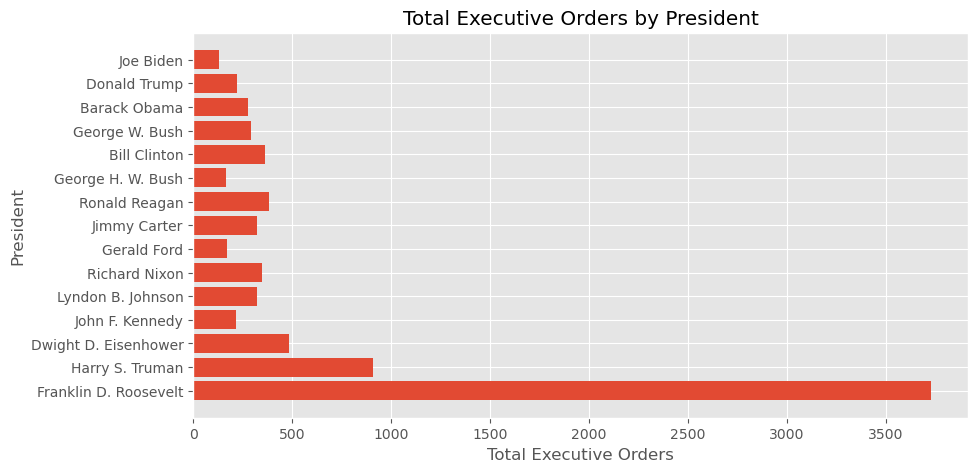

In [34]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df["Year"] = df["Period"].str[-4:]
df_2 = df.iloc[-15:].copy()
fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(y=df_2["President"], width=df_2["Total executive orders"])
plt.title("Total Executive Orders by President")
plt.xlabel("Total Executive Orders")
plt.ylabel("President")
plt.show()


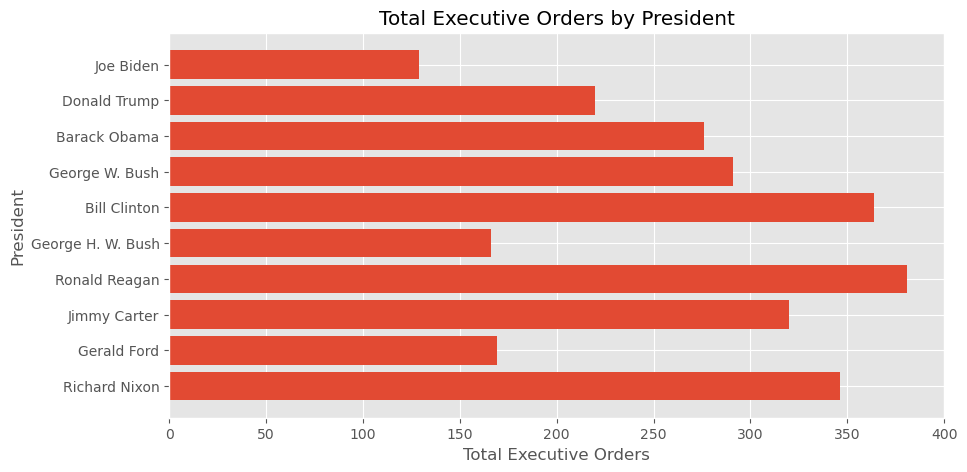

In [35]:
df_3 = df.iloc[-10:].copy()
fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(y=df_3["President"], width=df_3["Total executive orders"])
plt.title("Total Executive Orders by President")
plt.xlabel("Total Executive Orders")
plt.ylabel("President")
plt.show()


In [39]:
executive_orders.head()

,order_no,title,text,date,cleaned_text,text_string,target,tokens,year,president
0,6071,Appointment of August A. Gennerich,august a. gennerich may be appointed an opera...,"March 8, 1933","['august', 'gennerich', 'may', 'appoint', 'ope...",august gennerich may appoint operative secret ...,0,"['august', 'gennerich', 'may', 'appoint', 'ope...",1933.0,roosevelt
1,6072,Transfer of Control and Jurisdiction of Certai...,canal zoneby virtue of the authority vested i...,"March 8, 1933","['canal', 'zoneby', 'virtue', 'authority', 've...",canal zoneby virtue authority vested law hereb...,0,"['canal', 'zoneby', 'virtue', 'authority', 've...",1933.0,roosevelt
2,6073,Regulations Concerning the Operation of Banks,by virtue of the authority vested in me by se...,"March 10, 1933","['virtue', 'authority', 'vested', 'section', '...",virtue authority vested section act october st...,0,"['virtue', 'authority', 'vested', 'section', '...",1933.0,roosevelt
3,6084,Consolidating Federal Farm Credit Agencies,whereas sections 401 and 403 of title iv of p...,"March 27, 1933","['whereas', 'section', 'title', 'iv', 'part', ...",whereas section title iv part ii legislative a...,0,"['whereas', 'section', 'title', 'iv', 'part', ...",1933.0,roosevelt
4,6086,Establishing the Rio Grande Wildlife Refuge,it is hereby ordered that executive order no....,"March 28, 1933","['hereby', 'order', 'date', 'february', 'far',...",hereby order date february far relates establi...,0,"['hereby', 'order', 'date', 'february', 'far',...",1933.0,roosevelt


In [41]:
executive_orders = pd.read_csv('../data/eo_cleaned.csv', index_col=0)
executive_orders['text_string'][0]

'august gennerich may appoint operative secret service division treasury department without compliance requirement civil service rule recommend secretary treasury'